<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis - CAPSTONE PROJECT 
### Team 1007

## Table of Contents

1. [Introduction and Problem Statement](#section1)<br>
2. [Load the packages and data](#section2)<br>
3. [Data Pre-processing](#section3)<br>
4. [Exploratory Data Analysis](#eda)<br>
    - 4.1 [Plots for across States](#states)<br>
    - 4.2 [Plots for Maharashtra](#MH)<br>
5. [Summary of observations](#summary)<br>
6. [Conclusion](#conclusion)

<a id=section1></a> 
## 1. Introduction and Problem Statement

**Problem Statement**


<a id=section2></a> 
## 2. Load the packages and data 

In [1]:
!pip install mysql.connector


Processing ./Library/Caches/pip/wheels/42/2f/c3/692fc7fc1f0d8c06b9175d94f0fc30f4f92348f5df5af1b8b7/mysql_connector-2.2.9-cp37-cp37m-macosx_10_9_x86_64.whl


In [2]:
import sys                                                                      # Import packages
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.
    
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 100                 # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import pandas_profiling                      # Get a quick overview for all the variables using pandas_profiling                                         

from pandas.plotting import parallel_coordinates


 

### Loading Data

In [3]:
#Establize SQL connection to fetch data for Dept, Employee Details, Employee Master Data
def SqlConnection():
    return mysql.connector.connect(  host="cpanel.insaid.co",  user="student",  password="student",  database="Capstone2")

In [4]:
df_department = pd.read_sql('SELECT * FROM department_data', con=SqlConnection())

In [5]:
df_emp_det  = pd.read_sql('SELECT * FROM employee_details_data', con=SqlConnection())

In [6]:
df_emp_master = pd.read_sql('SELECT * FROM employee_data', con=SqlConnection())

In [7]:
df_emp_det.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [8]:
df_department.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [9]:
df_emp_master.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


<a id="section 3"></a>
##  Data Pre- processing

In [10]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [11]:
def analyze_df(df):
    print(df.shape)
    print("----------------------------------------Shape--------------------------------------------------")
    print(df.info(null_counts=True))
    print("--------------------------------------- Describe ---------------------------------------------")
    print(df.describe())
    print("-----------------------------------------Missing Data---------------------------------------------")
    print(missing_data(df))
    return(df.head())

In [12]:
analyze_df(df_emp_det)

(14245, 4)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None
--------------------------------------- Describe ---------------------------------------------
         employee_id           age
count  14245.000000   14245.000000
mean   112123.050544  32.889926   
std    8500.457343    9.970834    
min    100101.000000  22.000000   
25%    105775.000000  24.000000   
50%    111298.000000  29.000000   
75%    116658.000000  41.000000   
max    148988.000000  57.000000   
-----------------------------------------Missing Data-

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [13]:
analyze_df(df_emp_master)

(14150, 11)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
None
--------------------------------------- Describe -------------------------------------------

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [14]:
df_emp_master.status.value_counts()

Employed    10784
Left        3366 
Name: status, dtype: int64

In [15]:
df_emp_master.last_evaluation.unique()

array([0.8668, 0.5557, 0.4741, ..., 0.6436, 0.8366, 0.9073])

In [16]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
-IT        207 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [17]:
#207 Departments are -IT which is not a valid Dept ID. Change to D00-IT
df_emp_master =df_emp_master.replace({'-IT': 'D00-IT',})

In [18]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [19]:
df_new={'dept_id': 'D00-OTH'  , 'dept_name': 'Others', 'dept_head':'Other'}
df_department=df_department.append(df_new,ignore_index=True)

In [20]:
#707 Departments are null. These deparment should be classified as 'Unknown or Others' & 
#used for analysis, since there are employees of status as below:
#Employed    502
#Left        205

df_emp_master['department'] = np.where(df_emp_master['department'].isnull(),  'D00-OTH', df_emp_master['department'])


In [21]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
D00-OTH    707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [22]:
df_emp_master.tenure.value_counts(dropna=False)

3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
NaN     150 
Name: tenure, dtype: int64

In [23]:
#There are 150 records with NULL values   for tenure 
#Impute with median
df_emp_master['tenure'] = df_emp_master['tenure'].replace({np.nan: getattr(df_emp_master['tenure'], 'median')(),})

In [24]:
df_emp_master.tenure.value_counts(dropna=False)

3.0     6168
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
Name: tenure, dtype: int64

In [25]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
NaN         150
0.481001    3  
0.481880    2  
0.787487    2  
           ..  
0.138555    1  
0.551152    1  
0.410776    1  
0.883507    1  
0.158990    1  
Name: satisfaction, Length: 13498, dtype: int64

In [26]:
#There are 150 reocrds with NULL values for Satisfaction column
#impute with mean

df_emp_master['satisfaction'] = df_emp_master['satisfaction'].replace({np.nan: getattr(df_emp_master['satisfaction'], 'mean')(),})

In [27]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
0.621212    150
0.481001    3  
0.481880    2  
0.787487    2  
           ..  
0.551152    1  
0.410776    1  
0.883507    1  
0.472760    1  
0.929160    1  
Name: satisfaction, Length: 13498, dtype: int64

In [28]:
#Replacing 12104 Null values in Filed_complaint
df_emp_master['filed_complaint'] = np.where(df_emp_master['filed_complaint'].isnull(),  '0', df_emp_master['filed_complaint'])

In [29]:
#Correcting 13853 records with "recently_promoted" as NULL by replacing it with zero
df_emp_master['recently_promoted'] = np.where(df_emp_master['recently_promoted'].isnull(),  '0', df_emp_master['recently_promoted'])

In [30]:
#Deleting 2 records with emp id =0 and missing Dept

df_emp_master=df_emp_master.loc[(df_emp_master['employee_id']!=0) & (df_emp_master['department']!=None)]

In [32]:
#Around 1,487 values are missing in last_evaluation
# Indicator variable for last evaluation

df_emp_master['last_evaluation_missing']= df_emp_master.last_evaluation.isnull().astype(int)
df_emp_master['last_evaluation_missing'].unique()


# Missing values
df_emp_master.last_evaluation.fillna(0, inplace=True)


In [54]:
df_emp_master['last_evaluation_missing'].unique()


array([0, 1])

# Merging Datasets

In [33]:
df_department=df_department.rename(columns={'dept_id':'department'})

In [34]:
df_department.columns

Index(['department', 'dept_name', 'dept_head'], dtype='object')

In [35]:
df_final = df_emp_master.merge(df_emp_det,on='employee_id', how='left')

In [36]:
df_final.drop_duplicates()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,141.0,D00-SS,0,0.537866,3,0,low,0.610841,Employed,3.0,100833,0,29,Male,Unmarried
14112,168.0,D00-SS,0,0.643553,3,0,low,0.489559,Employed,3.0,118090,0,24,Female,Unmarried
14113,257.0,D00-SP,0,0.000000,3,0,medium,0.944942,Employed,3.0,106064,1,27,Male,Unmarried
14114,242.0,D00-IT,0,0.836603,4,0,low,0.740136,Employed,2.0,113083,0,46,Male,Married


In [37]:
df_department.columns = df_department.columns.str.strip()
df_final.columns=df_final.columns.str.strip()

In [38]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried


In [39]:
df_final=df_final.merge(df_department, on='department', how='left')

In [40]:
df_final.shape

(14145, 17)

In [41]:
df_final.drop_duplicates()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married,Others,Other
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried,Others,Other
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried,Sales,Edward J Bayley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14111,141.0,D00-SS,0,0.537866,3,0,low,0.610841,Employed,3.0,100833,0,29,Male,Unmarried,Sales,Edward J Bayley
14112,168.0,D00-SS,0,0.643553,3,0,low,0.489559,Employed,3.0,118090,0,24,Female,Unmarried,Sales,Edward J Bayley
14113,257.0,D00-SP,0,0.000000,3,0,medium,0.944942,Employed,3.0,106064,1,27,Male,Unmarried,Support,Amelia Westray
14114,242.0,D00-IT,0,0.836603,4,0,low,0.740136,Employed,2.0,113083,0,46,Male,Married,IT,Henry Adey


In [42]:
df_final.shape

(14145, 17)

In [43]:
analyze_df(df_final)

(14145, 17)
----------------------------------------Shape--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14145 entries, 0 to 14144
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14145 non-null  float64
 1   department               14145 non-null  object 
 2   filed_complaint          14145 non-null  object 
 3   last_evaluation          14145 non-null  float64
 4   n_projects               14145 non-null  int64  
 5   recently_promoted        14145 non-null  object 
 6   salary                   14145 non-null  object 
 7   satisfaction             14145 non-null  float64
 8   status                   14145 non-null  object 
 9   tenure                   14145 non-null  float64
 10  employee_id              14145 non-null  int64  
 11  last_evaluation_missing  14145 non-null  int64  
 12  age                   

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,last_evaluation_missing,age,gender,marital_status,dept_name,dept_head
0,246.0,D00-OTH,0,0.866838,6,0,medium,0.134415,Left,4.0,124467,0,42,Female,Married,Others,Other
1,134.0,D00-OTH,0,0.555718,2,0,low,0.511041,Left,3.0,112210,0,23,Female,Unmarried,Others,Other
2,156.0,D00-SS,1.0,0.474082,2,0,medium,0.405101,Left,3.0,126150,0,24,Female,Unmarried,Sales,Edward J Bayley
3,256.0,D00-SP,0,0.961360,6,0,low,0.152974,Left,4.0,125346,0,51,Female,Married,Support,Amelia Westray
4,146.0,D00-SS,0,0.507349,2,0,medium,0.434845,Left,3.0,113707,0,23,Female,Unmarried,Sales,Edward J Bayley


# Explore Data Analysis

In [44]:
### 1.Unique Employee ID
print(df_final.employee_id.nunique())

#There are 14116 unique employee id 

14116


In [45]:
df_final.status.value_counts()

Employed    10782
Left        3363 
Name: status, dtype: int64

<AxesSubplot:ylabel='employee_id'>

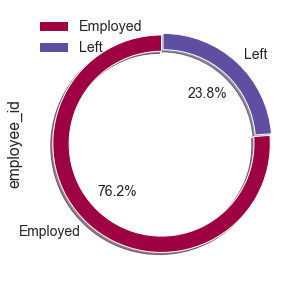

In [46]:
#df_emp_master.plot(kind='pie',column='status')
space = np.ones(2)/100
PlotData =(df_final.groupby('status').count()).employee_id

PlotData.plot(kind='pie', explode=space,  fontsize=14, autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                     shadow=True, startangle=90, figsize=(5,5), cmap='Spectral', legend=True)


<AxesSubplot:xlabel='tenure', ylabel='count'>

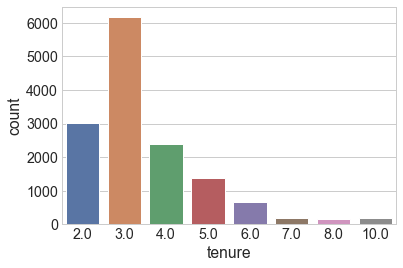

In [47]:
#space = np.ones(2)/100
#PlotData =(df_emp_master.groupby('tenure').count())
#PlotData.plot(kind="bar",y='employee_id')
sns.countplot(data=df_final, x='tenure')

<AxesSubplot:xlabel='tenure', ylabel='count'>

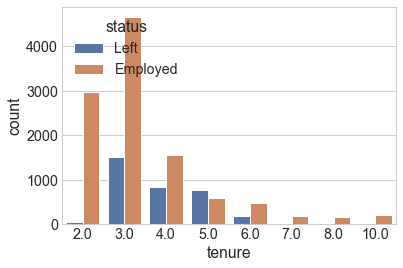

In [48]:
sns.countplot(data=df_final, x='tenure',  hue='status')

In [49]:
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')

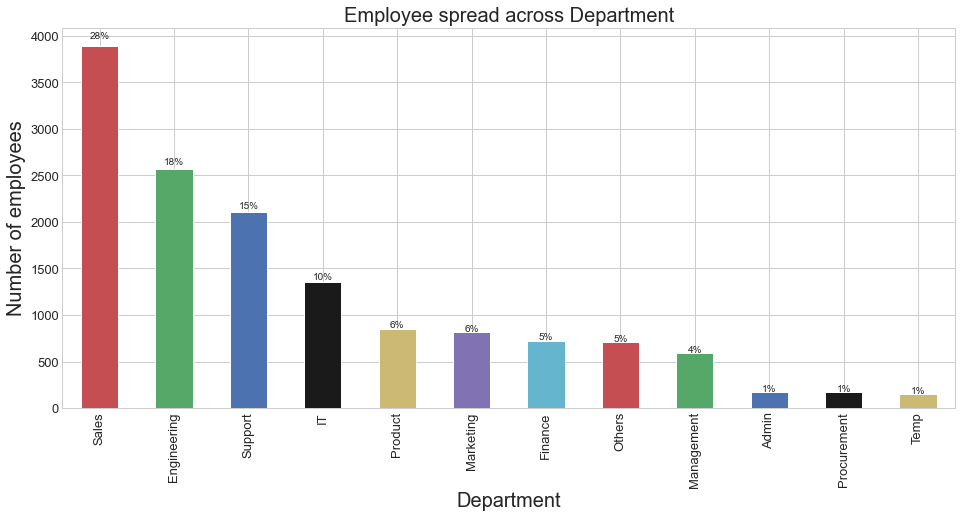

In [50]:
PlotData = (df_final.groupby(['dept_name','employee_id']).employee_id.count()).groupby('dept_name').count().nlargest(20)
ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)
plt.xlabel('Department',fontsize=20)
plt.ylabel('Number of employees',fontsize=20)
plt.title('Employee spread across Department',fontsize=20)
# ShowVBarValue()
ShowVBarPer()
plt.savefig('Department wise employee.png', bbox_inches='tight')

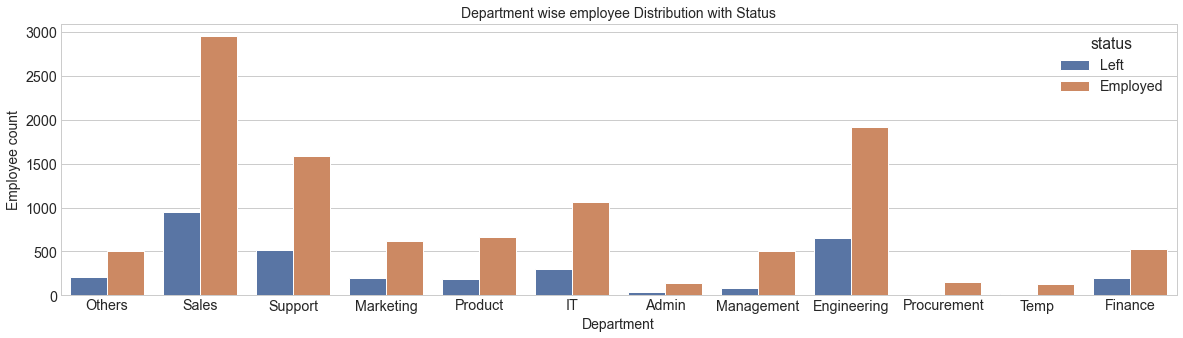

In [51]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
#ax = sns.countplot(x='phone_brand', hue="gender",order=PlotData.phone_brand.value_counts().iloc[:10].index, data=PlotData, ax=axis1)
sns.countplot(data=df_final, x='dept_name',  hue='status', ax=axis1)
plt.title("Department wise employee Distribution with Status",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarValue()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')

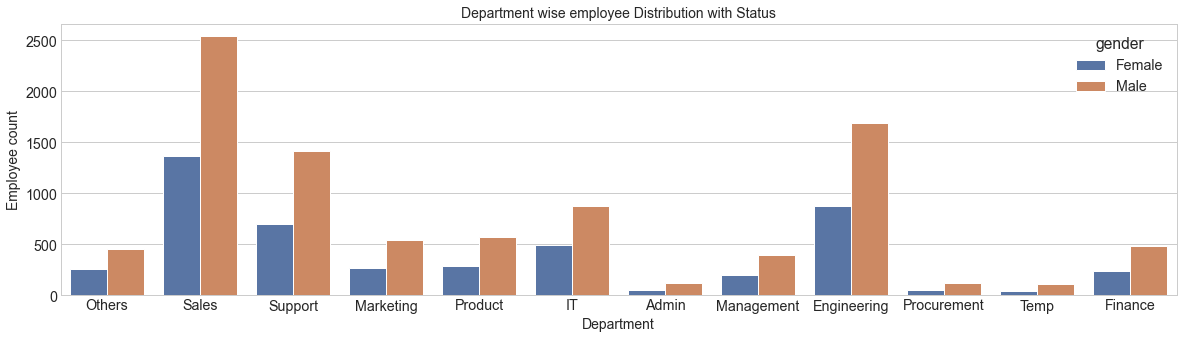

In [52]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
#ax = sns.countplot(x='phone_brand', hue="gender",order=PlotData.phone_brand.value_counts().iloc[:10].index, data=PlotData, ax=axis1)
sns.countplot(data=df_final, x='dept_name',  hue='gender', ax=axis1)
plt.title("Department wise employee Distribution with Status",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarValue()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')


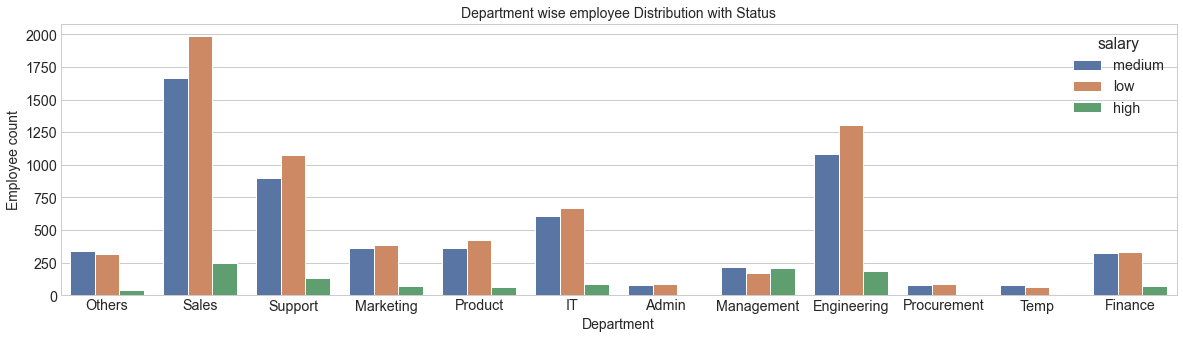

In [53]:
#ax = PlotData.plot.bar(figsize=(16,7), color= list('rgbkymc') ,  fontsize=13)

PlotData = df_final
fig, axis1 = plt.subplots(1,1,figsize=(20,5))
#ax = sns.countplot(x='phone_brand', hue="gender",order=PlotData.phone_brand.value_counts().iloc[:10].index, data=PlotData, ax=axis1)
sns.countplot(data=df_final, x='dept_name',  hue='salary', ax=axis1)
plt.title("Department wise employee Distribution with Status",fontsize=14)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Employee count',fontsize=14)
ShowVBarValue()
plt.savefig('Figure\BrandGenderwise.png', bbox_inches='tight')
